# Heart Failure correlation

- To establish a model to predict heart failure 
 

## Data source

https://www.kaggle.com/fedesoriano/heart-failure-prediction


## Overview




# Loading libraries and data

In [3]:
# Data wrangling
import numpy as np
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from imblearn.over_sampling import RandomOverSampler


- heart

In [32]:
# Load raw data
heart = pd.read_csv("heart.csv")

In [6]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [53]:
columns = heart.columns
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Exploratory Data Analysis

- overview data type in features
- handle object to one hot encoding


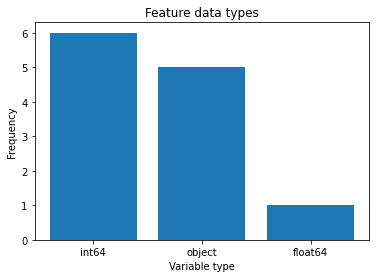

In [34]:
plt.bar([str(x) for x in heart.dtypes.value_counts().index], heart.dtypes.value_counts())
plt.ylabel("Frequency")
plt.xlabel("Variable type")
plt.title("Feature data types")
plt.show()

In [35]:
object_col = heart.select_dtypes(include='object').columns
object_col


Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [54]:
columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [39]:
df = pd.get_dummies(heart,columns =object_col)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


- Sex difference in occurence of heart failure

<AxesSubplot:xlabel='Sex', ylabel='count'>

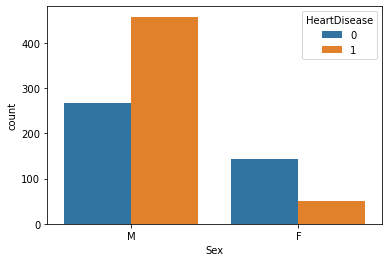

In [51]:
sns.countplot(x = heart['Sex'], hue=heart['HeartDisease'])


Object `sns.scatter` not found.


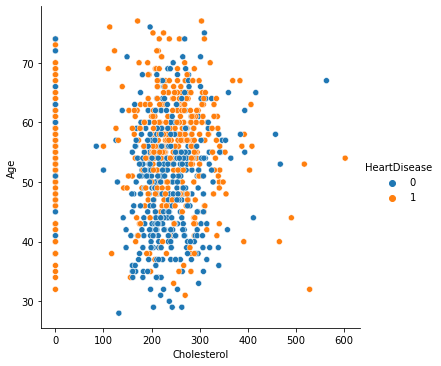

In [65]:
sns.relplot(x = heart['Cholesterol'],y = heart['Age'], hue=heart['HeartDisease'])

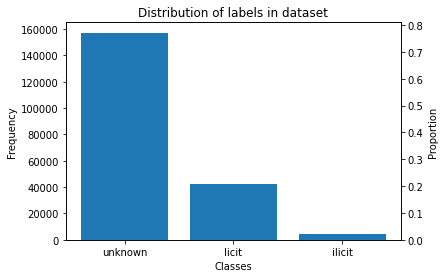

In [ ]:
fig, ax = plt.subplots()
ax.bar(classes["class_description"].unique(), classes["class_description"].value_counts())
ax.set_ylabel("Frequency")
ax.set_xlabel("Classes")
ax.set_title("Distribution of labels in dataset")
ax2 = ax.twinx()
ax2.bar(classes["class_description"].unique(), classes["class_description"].value_counts() / classes.shape[0])
ax2.set_ylabel("Proportion")
plt.show()

We can see that there are 167 columns in the dataset with 165 of them being of float type whilst the remaining 2 integer types are the transaction ID and time step. However we are not given much meta data on what these features are or how they were collected. However we know that the first 94 features are data collected around the transaction whilst the remaining features are derived from the previous 94 features such as taking means, order statistics, node degree etc.

Due to large number of features, and also no contextual information given for each feature, a histogram is used instead of heatmap to visualise redundancy amongst the features. It appears most of the features are not strongly correlated to each other. However does not account for non-linear relationship.

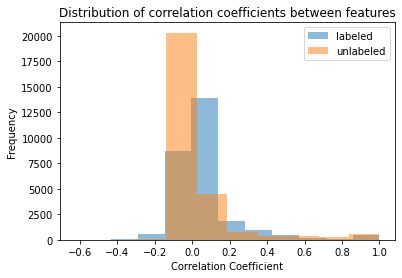

In [ ]:
plt.hist(labeled.iloc[:,2:-2].corr().to_numpy().flatten(), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].corr().to_numpy().flatten(), label="unlabeled", alpha=0.5)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Frequency")
plt.title("Distribution of correlation coefficients between features")
plt.legend()
plt.show()

To visualise the range of data we plot distributions of the min, max, mean, and median. It appears that the features vary in scale but have been centered already, or by for some reason the features collected are all centered around 0.

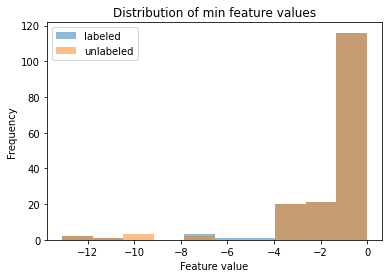

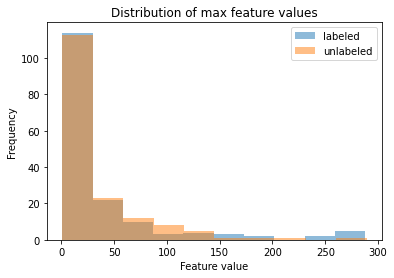

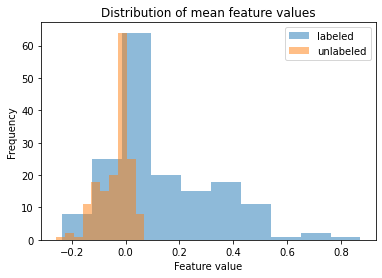

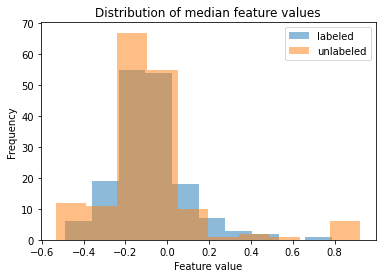

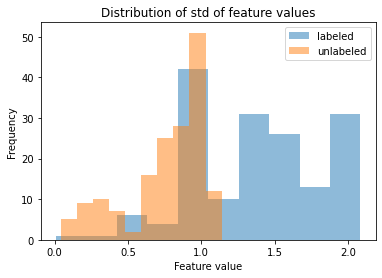

In [ ]:
plt.hist(labeled.iloc[:,2:-2].apply(np.min), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].apply(np.min), label="unlabeled", alpha=0.5)
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.title("Distribution of min feature values")
plt.legend()
plt.show()

plt.hist(labeled.iloc[:,2:-2].apply(np.max), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].apply(np.max), label="unlabeled", alpha=0.5)
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.title("Distribution of max feature values")
plt.legend()
plt.show()

plt.hist(labeled.iloc[:,2:-2].apply(np.mean), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].apply(np.mean), label="unlabeled", alpha=0.5)
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.title("Distribution of mean feature values")
plt.legend()
plt.show()

plt.hist(labeled.iloc[:,2:-2].apply(np.median), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].apply(np.median), label="unlabeled", alpha=0.5)
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.title("Distribution of median feature values")
plt.legend()
plt.show()

plt.hist(labeled.iloc[:,2:-2].apply(np.std), label="labeled", alpha=0.5)
plt.hist(unlabeled.iloc[:,2:-2].apply(np.std), label="unlabeled", alpha=0.5)
plt.xlabel("Feature value")
plt.ylabel("Frequency")
plt.title("Distribution of std of feature values")
plt.legend()
plt.show()

There are 50 time steps which are periods of 2 weeks of transactions

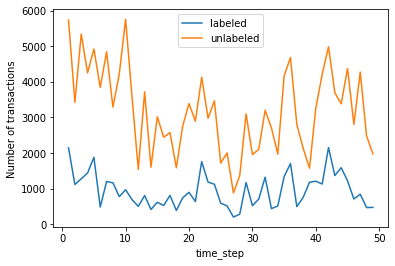

In [ ]:
labeled.groupby("time_step")["txId"].count().plot(label="labeled")
unlabeled.groupby("time_step")["txId"].count().plot(label="unlabeled")
plt.ylabel("Number of transactions")
plt.legend()
plt.show()

Visualising separation of licit and ilicit transactions with dimensionality reduction

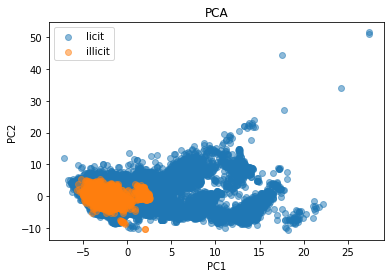

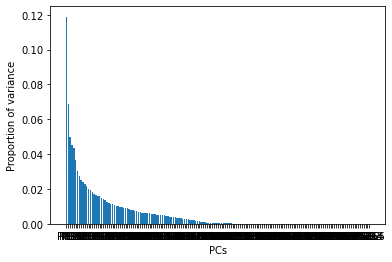

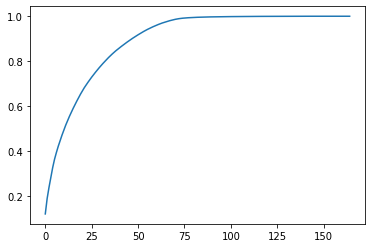

In [ ]:
pca = PCA()
ss = StandardScaler()
ss.fit(labeled.iloc[:,2:-2])
pca_features = pca.fit_transform(ss.transform(labeled.iloc[:,2:-2]))
plt.scatter(pca_features[labeled["class"]=="2"][:,0], pca_features[labeled["class"]=="2"][:,1], alpha=0.5, label="licit")
plt.scatter(pca_features[labeled["class"]=="1"][:,0], pca_features[labeled["class"]=="1"][:,1], alpha=0.5, label="illicit")
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

plt.bar(["PC{}".format(x) for x in range(1, pca_features.shape[1]+1)],pca.explained_variance_ratio_)
plt.ylabel("Proportion of variance")
plt.xlabel("PCs")
plt.show()

plt.plot(range(len(pca.explained_variance_ratio_)), np.cumsum(pca.explained_variance_ratio_))

# Building the classifier
Based on the exploratory analysis, there are several challenges. Firstly, there is a large amount of unlabeled data, which will not be usable for supervised learning. Secondly, within the labeled data, there is significant imbalance in the class labels which could affect training. Lastly, with PCA in 2 dimensions, there is no good separation of licit vs ilicit classes which could mean that classification might be challenging.

Although there are many aspects of the classifier pipeline that could be searched through, we will be limiting ourselves to the following options given the limited time.

## Class balance
During training, an imbalance in classes could affect the resulting metrics on test data. In this case we will compare 2 options
1. No change in class balance
2. Random over sampling

## Feature representation
The feature inputs to models can significantly affect performance. There are various pre-processing steps that could be used such as feature selection via thresholding methods, mutual information, dimensionality reduction and so on. For the purposes of this assignment we will be attempting the following
1. No change in base features
2. PCA with cut off based on 95% variation captured
3. Feature engineering to incorporate graph structure

## Classifier type
There are a large number of possible classifiers to attempt, but we have chosen 3 main types taking into account computational time required.

1. Logistic Regression
2. Random Forest
3. Graph Neural Networks

These 3 classifiers were chosen because they represent a good spread of approaches. Logistic regression is the simplest and will provide a baseline for comparison, representing some of the most traditional machine learning approaches. Random forest models is a step up in complexity, still within traditional machine learning approaches, but applying concepts such as bagging and ensemble learning. Lastly, graph neural networks are a more recent development applying deep learning approaches to leverage graph structure in a more flexible way than manually engineered features.

## Summary
In summary, the pipelines we will be attempting are as follows
1. Base features + logistic regression
2. Base features + over sampling + logistic regression
3. PCA on base features + logistic regression
4. PCA on base features + over sampling + logistic regression
5. Base and graph features + logistic regression
6. Base and graph features + over sampling + logistic regression
7. PCA on base and graph features + logistic regression
8. PCA on base and graph features + over sampling + logistic regression
9. Base features + random forest
10. Base features + over sampling + random forest
11. PCA on base features + random forest
12. PCA on base features + over sampling + random forest
13. Base and graph features + random forest
14. Base and graph features + over sampling + random forest
15. PCA on base and graph features + random forest
16. PCA on base and graph features + over sampling + random forest
17. Base features + graph convolution network

Additionally, each classifier will have hyperparameters tuned using gridsearch cv or some other manual search method.

## Evaluation
Accuracy, precision, recall, and F1 score will be calculated on test set for each model, but F1 score will be preferred as the data set is inherently imbalanced and in these cases accuracy and other metrics do not provide as robust a metric as F1.

In [ ]:
######################
# Preparing the data #
######################

def getPCA(data, threshold):
    ss = StandardScaler()
    pca = PCA()
    output = pca.fit_transform(ss.fit_transform(data))
    idx = np.argmax(np.cumsum(pca.explained_variance_ratio_) > threshold)
    return output[:,:idx+1], pca, ss

# Create masks for train and test data
train_mask, test_mask = train_test_split(range(labeled.shape[0]), random_state=42)

# Create base feature train test
base_x_train = labeled.iloc[train_mask, 2:-2]
base_y_train = labeled.iloc[train_mask, -2].apply(int) - 1
base_x_test = labeled.iloc[test_mask, 2:-2]
base_y_test = labeled.iloc[test_mask, -2].apply(int) - 1

# Create PCA on base features train test
base_pca_x_train, base_pca_model, base_ss_model = getPCA(labeled.iloc[train_mask, 2:-2], 0.95)
base_pca_y_train = base_y_train
base_pca_x_test = base_pca_model.transform(base_ss_model.transform(base_x_test))
base_pca_y_test = base_y_test

# Attempt to create features to include graph structure by taking mean of first degree neighbours of each node
labeled_edges = labeled[["txId"]].merge(pds.sqldf("SELECT * FROM edges_undirected WHERE txId1 IN (SELECT txId FROM labeled) AND txId2 IN (SELECT txId FROM labeled)", globals()), how="left", left_on="txId", right_on="txId1")
neighbour_means = labeled_edges.merge(labeled, how="left", left_on="txId2", right_on="txId").groupby("txId_x")[["x.{}".format(i) for i in range(1,166)]].mean().reset_index()
neighbour_means[neighbour_means.isnull()] = 0
neighbour_means.columns = ["txId"] + ["x.neighbour.mean.{}".format(i) for i in range(1,166)]

labeled_graph = labeled.merge(neighbour_means, on="txId")

# Create graph features train test
graph_x_train = labeled_graph.iloc[train_mask, 2:].drop(["class","class_description"], axis=1)
graph_y_train = base_y_train
graph_x_test = labeled_graph.iloc[test_mask, 2:].drop(["class","class_description"], axis=1)
graph_y_test = base_y_test

# Create PCA on graph features train test
graph_pca_x_train, graph_pca_model, graph_ss_model = getPCA(labeled_graph.iloc[train_mask, 2:].drop(["class","class_description"], axis=1), 0.95)
graph_pca_y_train = base_y_train
graph_pca_x_test = graph_pca_model.transform(graph_ss_model.transform(labeled_graph.iloc[test_mask, 2:].drop(["class","class_description"], axis=1)))
graph_pca_y_test = base_y_test

# Create deep learning dataset
lookup = dict(zip(labeled["txId"].to_numpy(), range(labeled.shape[0])))
labeled_edges = labeled_edges.drop("txId", axis=1).dropna()
labeled_edges = labeled_edges.applymap(lambda x : lookup[x])
xs = torch.tensor(labeled.iloc[:,2:-2].to_numpy(), dtype=torch.float)
edge_list = add_self_loops(torch.tensor(labeled_edges.T.to_numpy(), dtype=torch.long))[0]
dl_data = Data(x=xs, edge_index=edge_list, y=torch.tensor(labeled["class"].to_numpy(dtype=np.int)-1, dtype=torch.long))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
models= {}

# Logistic regression on base features with no oversampling
hyper_parameters = {"penalty" : ["none", "l1", "l2", "elasticnet"]}

lr_base = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_base.fit(base_x_train, base_y_train)
models["lr_base"] = lr_base

# Logistic regression on base features with oversampling
rus = RandomOverSampler(random_state=42)
base_x_oversample, base_y_oversample = rus.fit_resample(base_x_train, base_y_train)
lr_base_oversample = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_base_oversample.fit(base_x_oversample, base_y_oversample)
models["lr_base_oversample"] = lr_base_oversample

# Logistic regression on base pca features with no oversampling
lr_base_pca = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_base_pca.fit(base_pca_x_train, base_pca_y_train)
models["lr_base_pca"] = lr_base_pca

# Logistic regression on base pca features with oversampling
rus = RandomOverSampler(random_state=42)
base_pca_x_oversample, base_pca_y_oversample = rus.fit_resample(base_pca_x_train, base_pca_y_train)
lr_base_pca_oversample = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_base_pca_oversample.fit(base_pca_x_oversample, base_pca_y_oversample)
models["lr_base_pca_oversample"] = lr_base_pca_oversample

# Logistic regression on graph features with no oversampling
lr_graph = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_graph.fit(graph_x_train, graph_y_train)
models["lr_graph"] = lr_graph

# Logistic regression on graph features with oversampling
rus = RandomOverSampler(random_state=42)
graph_x_oversample, graph_y_oversample = rus.fit_resample(graph_x_train, graph_y_train)
lr_graph_oversample = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_graph_oversample.fit(graph_x_oversample, graph_y_oversample)
models["lr_graph_oversample"] = lr_graph_oversample

# Logistic regression on graph pca features with no oversampling
lr_graph_pca = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_graph_pca.fit(graph_pca_x_train, graph_pca_y_train)
models["lr_graph_pca"] = lr_graph_pca

# Logistic regression on graph pca features with oversampling
rus = RandomOverSampler(random_state=42)
graph_pca_x_oversample, graph_pca_y_oversample = rus.fit_resample(graph_pca_x_train, graph_pca_y_train)
lr_graph_pca_oversample = GridSearchCV(LogisticRegression(solver="saga", l1_ratio=0.5), param_grid=hyper_parameters, verbose=2)
lr_graph_pca_oversample.fit(graph_pca_x_oversample, graph_pca_y_oversample)
models["lr_graph_pca_oversample"] = lr_graph_pca_oversample


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   9.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  15.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  12.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   8.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   6.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   8.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=   8.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  14.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  15.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  19.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  20.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  16.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  16.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  16.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  12.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=  17.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  25.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  17.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  16.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  16.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=  27.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   2.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=   2.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   3.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=   3.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   7.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   5.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=   4.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=   6.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  12.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  17.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  17.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  17.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  17.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  17.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  17.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  17.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  17.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  17.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=  17.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  32.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  32.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  32.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  32.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  42.6s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  31.0s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  21.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=  21.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  32.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  32.7s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  32.8s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  32.9s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=  32.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=   6.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=   4.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=   6.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


Fitting 5 folds for each of 4 candidates, totalling 20 fits


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   8.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .......................................penalty=none; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  11.1s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l1; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty)


[CV] END .........................................penalty=l2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .........................................penalty=l2; total time=   8.2s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  11.5s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


[CV] END .................................penalty=elasticnet; total time=  11.3s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=none)
  "(penalty={})".format(self.penalty)


[CV] END .................................penalty=elasticnet; total time=  11.4s


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [ ]:
# Random forest on base features with no oversampling
hyper_parameters = {"max_features" : ["sqrt", "log2"],
                    "criterion" : ["gini", "entropy"],
                    "n_estimators" : [50, 100, 150]}

rf_base = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_base.fit(base_x_train, base_y_train)
models["rf_base"] = rf_base

# Random forest on base features with oversampling
rus = RandomOverSampler(random_state=42)
base_x_oversample, base_y_oversample = rus.fit_resample(base_x_train, base_y_train)
rf_base_oversample = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_base_oversample.fit(base_x_oversample, base_y_oversample)
models["rf_base_oversample"] = rf_base_oversample

# Random forest on base pca features with no oversampling
rf_base_pca = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_base_pca.fit(base_pca_x_train, base_pca_y_train)
models["rf_base_pca"] = rf_base_pca

# Random forest on base pca features with oversampling
rus = RandomOverSampler(random_state=42)
base_pca_x_oversample, base_pca_y_oversample = rus.fit_resample(base_pca_x_train, base_pca_y_train)
rf_base_pca_oversample = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_base_pca_oversample.fit(base_pca_x_oversample, base_pca_y_oversample)
models["rf_base_pca_oversample"] = rf_base_pca_oversample

# Random forest on graph features with no oversampling
rf_graph = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_graph.fit(graph_x_train, graph_y_train)
models["rf_graph"] = rf_graph

# Random forest on graph features with oversampling
rus = RandomOverSampler(random_state=42)
graph_x_oversample, graph_y_oversample = rus.fit_resample(graph_x_train, graph_y_train)
rf_graph_oversample = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_graph_oversample.fit(graph_x_oversample, graph_y_oversample)
models["rf_graph_oversample"] = rf_graph_oversample

# Random forest on graph pca features with no oversampling
rf_graph_pca = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_graph_pca.fit(graph_pca_x_train, graph_pca_y_train)
models["rf_graph_pca"] = rf_graph_pca

# Random forest on graph pca features with oversampling
rus = RandomOverSampler(random_state=42)
graph_pca_x_oversample, graph_pca_y_oversample = rus.fit_resample(graph_pca_x_train, graph_pca_y_train)
rf_graph_pca_oversample = GridSearchCV(RandomForestClassifier(), param_grid=hyper_parameters, verbose=2)
rf_graph_pca_oversample.fit(graph_pca_x_oversample, graph_pca_y_oversample)
models["rf_graph_pca_oversample"] = rf_graph_pca_oversample


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=  16.0s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   8.8s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   7.7s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   5.8s
[CV] END .criterion=gini, max_features=sqrt, n_estimators=50; total time=   5.7s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  11.4s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  11.1s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  11.3s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  11.3s
[CV] END criterion=gini, max_features=sqrt, n_estimators=100; total time=  11.3s
[CV] END criterion=gini, max_features=sqrt, n_estimators=150; total time=  18.3s
[CV] END criterion=gini, max_features=sqrt, n_es

In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, out_c):
        super().__init__()
        self.conv1 = GCNConv(dl_data.num_node_features, out_c)
        self.conv2 = GCNConv(out_c, 2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

lrs = [0.01, 0.001, 0.0001]
out_cs = [16, 32, 48]
dl_models = []
for lr in lrs:
    for out_c in out_cs:
        print("Training model with out_c={} and learning rate={}".format(out_c, lr))
        scores = {}
        scores["lr"] = lr
        scores["out_c"] = out_c
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        model = GCN(out_c).to(device)
        data = dl_data.to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=5e-4)

        model.train()
        for epoch in range(200):
            optimizer.zero_grad()
            out = model(data)
            loss = F.nll_loss(out[train_mask], data.y[train_mask])
            loss.backward()
            optimizer.step()

        model.eval()
        pred = model(data).argmax(dim=1)
        scores["test_acc"] = accuracy_score(pred[test_mask], data.y[test_mask])
        scores["test_recall"] = recall_score(pred[test_mask], data.y[test_mask])
        scores["test_precision"] = precision_score(pred[test_mask], data.y[test_mask])
        scores["test_f1"] = f1_score(pred[test_mask], data.y[test_mask])
        dl_models.append(scores)
dl_models = pd.DataFrame(dl_models)

In [ ]:
evaluations = []
for k,v in models.items():
    scores = {}
    scores["clf"] = k
    scores["params"] = v.best_params_
    if k.find("base_pca") > -1:
        ypred = v.best_estimator_.predict(base_pca_x_test[:,:base_pca_x_train.shape[1]])
        scores["test_acc"] = accuracy_score(ypred, base_y_test)
        scores["test_recall"] = recall_score(ypred, base_y_test)
        scores["test_precision"] = precision_score(ypred, base_y_test)
        scores["test_f1"] = precision_score(ypred, base_y_test)
    elif k.find("base") > -1:
        ypred = v.best_estimator_.predict(base_x_test)
        scores["test_acc"] = accuracy_score(ypred, base_y_test)
        scores["test_recall"] = recall_score(ypred, base_y_test)
        scores["test_precision"] = precision_score(ypred, base_y_test)
        scores["test_f1"] = precision_score(ypred, base_y_test)
    elif k.find("graph_pca") > -1:
        ypred = v.best_estimator_.predict(graph_pca_x_test[:,:graph_pca_x_train.shape[1]])
        scores["test_acc"] = accuracy_score(ypred, base_y_test)
        scores["test_recall"] = recall_score(ypred, base_y_test)
        scores["test_precision"] = precision_score(ypred, base_y_test)
        scores["test_f1"] = precision_score(ypred, base_y_test)
    elif k.find("graph") > -1:
        ypred = v.best_estimator_.predict(graph_x_test)
        scores["test_acc"] = accuracy_score(ypred, base_y_test)
        scores["test_recall"] = recall_score(ypred, base_y_test)
        scores["test_precision"] = precision_score(ypred, base_y_test)
        scores["test_f1"] = precision_score(ypred, base_y_test)
    evaluations.append(scores)
evaluation_df = pd.DataFrame(evaluations)

## Results
### Deep learning model scores

In [ ]:
dl_models.sort_values("test_f1", ascending=False)

,lr,out_c,test_acc,test_recall,test_precision,test_f1
2,0.0100,48,0.968130,0.972072,0.993129,0.982488
1,0.0100,32,0.965467,0.969003,0.993415,0.981057
0,0.0100,16,0.964007,0.968081,0.992747,0.980259
5,0.0010,48,0.959024,0.962456,0.993225,0.977598
4,0.0010,32,0.955502,0.959159,0.992843,0.975710
3,0.0010,16,0.953784,0.955967,0.994465,0.974836
8,0.0001,48,0.909114,0.913021,0.993702,0.951654
7,0.0001,32,0.900180,0.902393,0.996946,0.947316
6,0.0001,16,0.565072,0.969650,0.533543,0.688335


### Classical model scores

In [ ]:
evaluation_df.sort_values("test_f1", ascending=False)

,clf,params,test_acc,test_recall,test_precision,test_f1
8,rf_base,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.987630,0.986628,0.999809,0.999809
12,rf_graph,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.987115,0.986345,0.999523,0.999523
13,rf_graph_oversample,"{'criterion': 'gini', 'max_features': 'log2', ...",0.987544,0.986993,0.999332,0.999332
9,rf_base_oversample,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.988747,0.988390,0.999237,0.999237
14,rf_graph_pca,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.964264,0.964546,0.996946,0.996946
15,rf_graph_pca_oversample,"{'criterion': 'entropy', 'max_features': 'log2...",0.967700,0.968904,0.996087,0.996087
10,rf_base_pca,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.962718,0.964315,0.995419,0.995419
11,rf_base_pca_oversample,"{'criterion': 'gini', 'max_features': 'log2', ...",0.960914,0.962960,0.994847,0.994847
0,lr_base,{'penalty': 'l2'},0.911691,0.917779,0.990648,0.990648
4,lr_graph,{'penalty': 'none'},0.934370,0.940510,0.989694,0.989694


## Discussion

### Overall ranking
Overall the best classifiers are random forest classifiers, which is in keeping with the findings published along with the original dataset. Logistic regression performs remarkably well, outcompeting the graph convolutional networks. However, optimising the graph convolutional network hyperparameters is likely more challenging that for logistic regression and the random forest. Based on the space sampled thus far, it appears that there is still room for improvement, as increasing the output channel dimensions has a positive effect on the F1 score, and it has not yet reached a plateau. Additionally, the models may not have completed training, as the increase in learning rate for 200 epochs still provides increased performance.

### Effect of oversampling
In all cases the use of oversampling to during training results in worse performance.

### Effect of dimensionality reduction
In all cases the use of PCA to construct orthogonal features and reduce dimensionality results in worse performance.

### Effect of manual graph features
In most cases, the addition of graph features as created by taking the mean of each feature of a nodes first degree neighbours did not result in significant improvement in F1 score. This is likely because the existing features already include some graph related features such as in and out degree.

## Limitations

Due to time limitations, full exploration of each model was not possible, particularly for the deep learning approach. Furthermore, the fact that random forests can perform at such a high level on this data set also suggests that any classifier would be hitting some hard limit of performance ceiling, as the difference in performance between each classifier is minimal.